In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

In [2]:
df_data_pump = pd.read_csv('data_pump_not_ico.csv')
df_data_not_pump = pd.read_csv('data_not_pump.csv')

In [3]:
df_data_pump.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'market', 'start', 'base_price', 'end',
       'last_price', 'increase', 'pump_length', 'date_listing',
       'pump_to_listing', 'last_slope', 'last_slope_adi', 'aroon_up',
       'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line', 'macd_signal',
       'stochastic', 'stochastic_signal', 'delta_stochastic', 'rsi_val',
       'coef_corr', 'last_slope_btc'],
      dtype='object')

In [4]:
df_data_not_pump.columns

Index(['Unnamed: 0', 'market', 'start', 'last_slope', 'last_slope_adi',
       'aroon_up', 'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line',
       'macd_signal', 'stochastic', 'stochastic_signal', 'delta_stochastic',
       'rsi_val', 'coef_corr', 'last_slope_btc'],
      dtype='object')

In [5]:
df_pump_cand = df_data_pump[['market','start','last_slope', 'last_slope_adi',
       'aroon_up', 'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line',
       'macd_signal', 'stochastic', 'stochastic_signal', 'delta_stochastic',
       'rsi_val', 'coef_corr', 'last_slope_btc']]
df_not_pump_cand = df_data_not_pump[['market','start','last_slope', 'last_slope_adi',
       'aroon_up', 'aroon_down', 'aroon_diff', 'macd_diff', 'macd_line',
       'macd_signal', 'stochastic', 'stochastic_signal', 'delta_stochastic',
       'rsi_val', 'coef_corr', 'last_slope_btc']]

In [6]:
df_not_pump_cand['is_pump'] = np.zeros(len(df_not_pump_cand))
df_pump_cand['is_pump'] = np.ones(len(df_pump_cand))

C:\Users\asus\AppData\Local\Temp\ipykernel_14492\2822038541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pump_cand['is_pump'] = np.ones(len(df_pump_cand))


In [7]:
df_combine = pd.concat([df_not_pump_cand,df_pump_cand])


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_combine['last_slope'],y=df_combine['last_slope_adi'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)))
fig.show()

fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=df_pump_cand['last_slope']),row=1,col=1)
fig.add_trace(go.Histogram(x=df_not_pump_cand['last_slope']),row=1,col=2)
fig.add_trace(go.Histogram(x=df_pump_cand['last_slope_adi']),row=2,col=1)
fig.add_trace(go.Histogram(x=df_not_pump_cand['last_slope_adi']),row=2,col=2)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_combine['aroon_up'],y=df_combine['aroon_down'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)))
fig.add_trace(go.Scatter(x=[0,100], y=[0,100],mode='lines'))
fig.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Scatter(x=df_combine['macd_line'],y=df_combine['macd_signal'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)), row=1, col=1)

fig.add_trace(go.Histogram(x=df_pump_cand['macd_diff']),row=1,col=2)
fig.add_trace(go.Histogram(x=df_not_pump_cand['macd_diff']),row=1,col=3)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_combine['stochastic'],y=df_combine['stochastic_signal'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)))
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2)

# fig.add_trace(go.Scatter(x=df_combine['macd_line'],y=df_combine['macd_signal'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)), row=1, col=1)

fig.add_trace(go.Histogram(x=df_pump_cand['rsi_val']),row=1,col=1)
fig.add_trace(go.Histogram(x=df_not_pump_cand['rsi_val']),row=1,col=2)

fig.update_xaxes(
    range=(0, 100),
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_combine['coef_corr'],y=df_combine['last_slope_btc'],marker_color=df_combine['is_pump'],mode='markers',marker=dict(showscale=True)))
fig.show()

<Axes: >

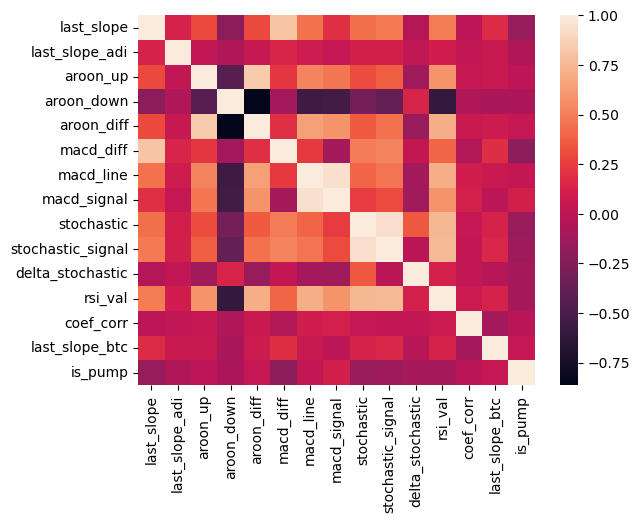

In [14]:
# plt.matshow(df_combine.loc[:, ~df_combine.columns.isin(['market', 'start'])].corr())
# plt.show()
sns.heatmap(df_combine.loc[:, ~df_combine.columns.isin(['market', 'start'])].corr())

In [12]:
import plotly.graph_objects as go
from sklearn import preprocessing

# scaler = preprocessing.MinMaxScaler()

X = df_combine.loc[:, ~df_combine.columns.isin(['market', 'start','is_pump'])]
# X = scaler.fit_transform(X)
y = df_combine['is_pump']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# columns = X_train.columns

LOGISTIC REGRESSION

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(confusion_matrix(y_test, logreg.predict(X_test)))
print(classification_report(y_test, logreg.predict(X_test)))

[[376  24]
 [172  39]]
              precision    recall  f1-score   support

         0.0       0.69      0.94      0.79       400
         1.0       0.62      0.18      0.28       211

    accuracy                           0.68       611
   macro avg       0.65      0.56      0.54       611
weighted avg       0.66      0.68      0.62       611



KNN

In [14]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[300 100]
 [120  91]]
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       400
         1.0       0.48      0.43      0.45       211

    accuracy                           0.64       611
   macro avg       0.60      0.59      0.59       611
weighted avg       0.63      0.64      0.64       611



In [15]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[394   6]
 [197  14]]
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.80       400
         1.0       0.70      0.07      0.12       211

    accuracy                           0.67       611
   macro avg       0.68      0.53      0.46       611
weighted avg       0.68      0.67      0.56       611



DECISION TREE

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
pred = dt.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[291 109]
 [100 111]]
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       400
         1.0       0.50      0.53      0.52       211

    accuracy                           0.66       611
   macro avg       0.62      0.63      0.63       611
weighted avg       0.66      0.66      0.66       611



RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
 
# Fit the regressor with x and y data
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[354  46]
 [132  79]]
              precision    recall  f1-score   support

         0.0       0.73      0.89      0.80       400
         1.0       0.63      0.37      0.47       211

    accuracy                           0.71       611
   macro avg       0.68      0.63      0.63       611
weighted avg       0.70      0.71      0.69       611



GRADIENT BOOSTING

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

# selector = RFE(gb, n_features_to_select=10, step=1)

# selector.fit(X_train, y_train)

gb.fit(X_train, y_train)

pred = gb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[351  49]
 [112  99]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81       400
         1.0       0.67      0.47      0.55       211

    accuracy                           0.74       611
   macro avg       0.71      0.67      0.68       611
weighted avg       0.73      0.74      0.72       611



GPR

In [19]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)

pred = gpc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[384  16]
 [168  43]]
              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81       400
         1.0       0.73      0.20      0.32       211

    accuracy                           0.70       611
   macro avg       0.71      0.58      0.56       611
weighted avg       0.71      0.70      0.64       611



NN

In [20]:
import tensorflow as tf
from tensorflow import keras

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(len(X[0]),)),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1569 (6.13 KB)
Trainable params: 1569 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=200, # you can set this to a big number!
                    batch_size=20,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)


Epoch 1/200


98/98 [==============================] - 2s 6ms/step - loss: 0.6514 - accuracy: 0.6346 - val_loss: 0.6565 - val_accuracy: 0.6217
Epoch 2/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6479 - val_loss: 0.6574 - val_accuracy: 0.6176
Epoch 3/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6469 - val_loss: 0.6572 - val_accuracy: 0.6196
Epoch 4/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.6566 - val_loss: 0.6647 - val_accuracy: 0.6258
Epoch 5/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.6576 - val_loss: 0.6569 - val_accuracy: 0.6196
Epoch 6/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6576 - val_loss: 0.6573 - val_accuracy: 0.6217
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6581 - val_loss: 0.6567 - val_accuracy: 0.6258
Epoch 8/20

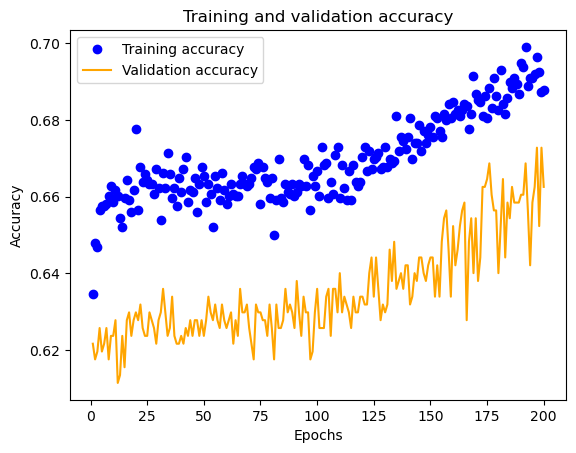

In [24]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
pred = model.predict(X_test)
pred = np.round(pred)
# pred
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

20/20 [==============================] - 0s 2ms/step
[[370  30]
 [153  58]]
              precision    recall  f1-score   support

         0.0       0.71      0.93      0.80       400
         1.0       0.66      0.27      0.39       211

    accuracy                           0.70       611
   macro avg       0.68      0.60      0.59       611
weighted avg       0.69      0.70      0.66       611

